In [157]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

<h1>Challenge 1</h1>

[ 2001.]


/home/sufyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


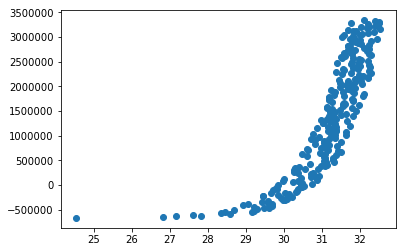

In [308]:
# del(df)
x=np.linspace(1,2000,250)
df = pd.DataFrame()
df['x'] = x
df['B0'] = 24
B1=np.log(x)
df['B1']=B1
y= df.B0 + df.B1 + np.random.rand(len(df.x))
df['X2'] = df.x**2

LinReg=LinearRegression()
LinReg.fit(df.x.reshape(-1,1), df.X2)
ypred=LinReg.predict(x.reshape(-1,1))
print(LinReg.coef_)
plt.scatter(y, ypred)
#plt.plot([0,500],[0,500])

[ 0.00152368]


/home/sufyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


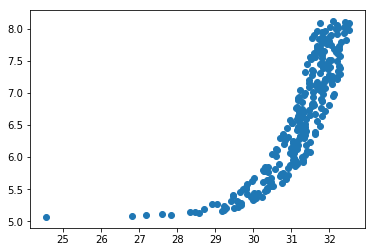

In [312]:
df['Xlog'] = np.log(df.x)
LinReg.fit(df.x.reshape(-1,1), df.Xlog)
LinReg.coef_

ypred=LinReg.predict(x.reshape(-1,1))
print(LinReg.coef_)
plt.scatter(y, ypred)

<h1>Challenge 2</h1>

[  0.00000000e+00   2.59736893e+01   0.00000000e+00   2.71867559e-03]
MSE: 48.16980000086304


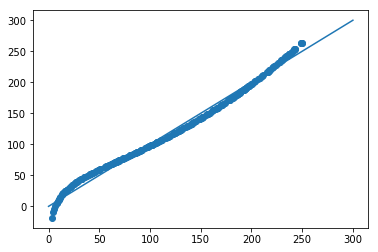

In [375]:
# del(df)
x=np.linspace(1,250,1000)
df = pd.DataFrame()
df['x'] = x
df['B0'] = 24
B1=np.log(x)
df['B1']=B1
df['B2']=50
y= df.B0 + df.B1*df.x + df.B2*df.x**2 + np.random.rand(len(df.x))
df['X2'] = df.x**2

x_train, x_test, y_train, y_test= train_test_split(df.iloc[:,1:], df.x)

LinReg=LinearRegression()
LinReg.fit(x_train, y_train)
ypred=LinReg.predict(x_test)
print(LinReg.coef_)
plt.scatter(y_test, ypred)
plt.plot([0,300],[0,300])
print("MSE: {}".format(mean_squared_error(y_test,ypred)))

<h1>Challenge 3</h1>

In [398]:
for i in range(1,8):
    df['X{}'.format(i)]=df.x**i
    
    x_train, x_test, y_train, y_test= train_test_split(df.iloc[:,1:], df.x)
    LinReg=LinearRegression()
    LinReg.fit(x_train, y_train)
    ypredtrain=LinReg.predict(x_train)
    ypredtest=LinReg.predict(x_test)
    print("{}-order term".format(i))
    print("train MSE: {}".format(mean_squared_error(y_train,ypredtrain)))
    print("test MSE: {}".format(mean_squared_error(y_test,ypredtest)))
    print("r-squared {}".format(r2_score(y_test,ypredtest)))
    print("AIC: {}\n".format(sum((y_test-ypredtest)**2)))

1-order term
train MSE: 0.6119817319130214
test MSE: 0.6707247043066575
r-squared 0.9998673046606232
AIC: 167.6811760766645

2-order term
train MSE: 0.5885533012839312
test MSE: 0.7383963269149524
r-squared 0.9998564212396681
AIC: 184.59908172873824

3-order term
train MSE: 0.6610067494714279
test MSE: 0.5429732612223506
r-squared 0.9998952895891456
AIC: 135.7433153055876

4-order term
train MSE: 0.6363715908597625
test MSE: 0.5925425227662788
r-squared 0.9998896919566171
AIC: 148.13563069156956

5-order term
train MSE: 0.6992641713331595
test MSE: 0.42798643447535495
r-squared 0.9999115511526276
AIC: 106.99660861883876

6-order term
train MSE: 0.6620709358804472
test MSE: 0.5197235554726642
r-squared 0.999894484734016
AIC: 129.93088886816608

7-order term
train MSE: 0.6736695210607558
test MSE: 0.48713691184860347
r-squared 0.9998935683916402
AIC: 121.78422796215078



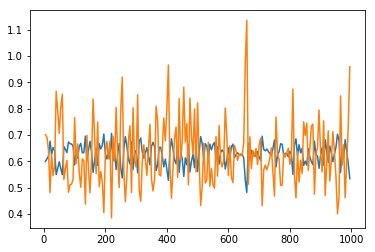

In [403]:
trainlist=[]
testlist=[]
indexlist=[]
for i in range(5,len(df),5):  
    indexlist.append(i)
    x_train, x_test, y_train, y_test= train_test_split(df.iloc[:,1:], df.x)
    LinReg=LinearRegression()
    LinReg.fit(x_train, y_train)
    ypredtrain=LinReg.predict(x_train)
    ypredtest=LinReg.predict(x_test)
    trainlist.append(mean_squared_error(y_train,ypredtrain))
    testlist.append(mean_squared_error(y_test,ypredtest))
plt.plot(indexlist,trainlist)
plt.plot(indexlist,testlist)